<a href="https://colab.research.google.com/github/Ksenya-Tuboltseva/Python_pandas/blob/main/Python_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D1%8B%D1%85_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/cookie_cats.csv")
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [7]:
##смотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [9]:
##проверяем на дубликаты
df.duplicated().sum()

0

In [50]:
##проверяем на пропущенные данные
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [13]:
##смотрим размер 1ой группы
gate_30 = df[df['version']=="gate_30"]
len(gate_30)

44700

In [14]:
##смотрим размер 2ой группы
gate_40 = df[df['version']=="gate_40"]
len(gate_40)

45489

In [20]:
##смотрим средние размеры количества игр за первые 14 дней обеих групп
gate_30['sum_gamerounds'].mean(), gate_40['sum_gamerounds'].mean()

(52.45626398210291, 51.29877552814966)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<function matplotlib.pyplot.show(close=None, block=None)>

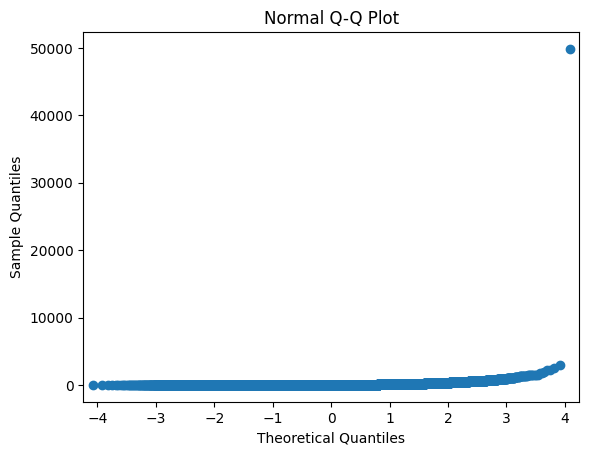

In [53]:
##проверяем распределение 1ой группы
fig = sm.qqplot(gate_30['sum_gamerounds'], color='green')
plt.title('Normal Q-Q Plot')
plt.show

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<function matplotlib.pyplot.show(close=None, block=None)>

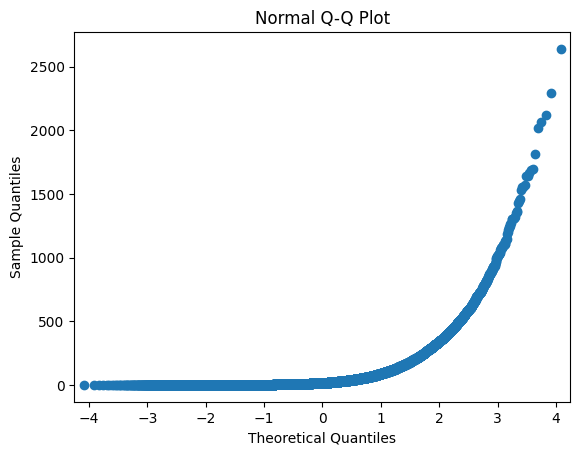

In [23]:
##проверяем распределение 2ой группы
fig = sm.qqplot(gate_40['sum_gamerounds'], color='green')
plt.title('Normal Q-Q Plot')
plt.show

Судя по полученным QQ графикам данные не подчинаются номальному распределению

<Axes: xlabel='version', ylabel='sum_gamerounds'>

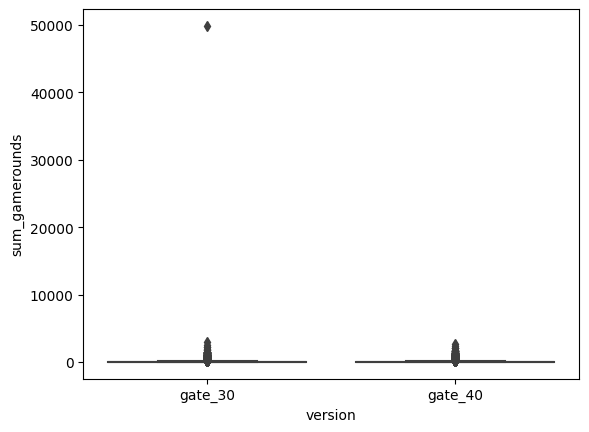

In [51]:
##отрисуем данные на ящике с усами
sns.boxplot(x=df['version'], y=df['sum_gamerounds'])

По получившемуся графику отмечаем, что в группе gate_30 находится одно экстремально высокое значение

<Axes: xlabel='version', ylabel='sum_gamerounds'>

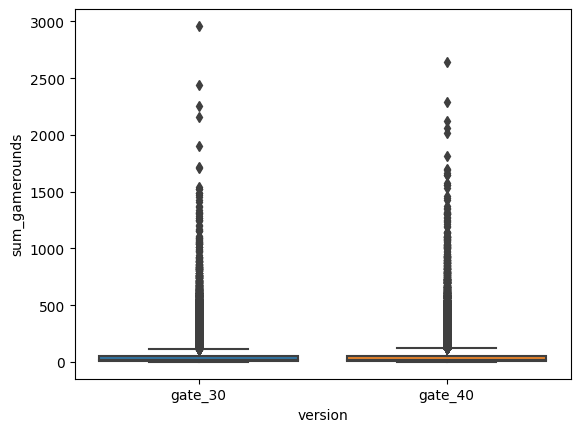

In [52]:
##избавляемся от выброса и отрисовываем график заново
df = df[df['sum_gamerounds'] < 10000]
sns.boxplot(x=df['version'], y=df['sum_gamerounds'])

In [56]:
gate_30_new = df[df['version']=="gate_30"]
gate_30_new

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [58]:
gate_40_new = df[df['version']=="gate_40"]
gate_40_new

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


Подправляем наши группы после удаления выбросов и можем отметить, что был только один выброс в группе gate_30

In [59]:
stats.kstest(gate_30_new['sum_gamerounds'], 'norm')

KstestResult(statistic=0.8724153079945488, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [60]:
stats.kstest(gate_40_new['sum_gamerounds'], 'norm')

KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)

Результаты теста Калмагорова-Смирнова так же указывают не ненормальное распределение

In [61]:
stats.mannwhitneyu(gate_30_new['sum_gamerounds'], gate_40_new['sum_gamerounds'])

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

Полученное при проведении теста Манна-Уитни значение p-value = 0.5 > alpha = 0.05 => статистически значимых различий между группами нет в параметре количества игр за 14 дней

In [62]:
##проверим корреляцию данных
gate_30_new.corr()

<ipython-input-62-728f28f455a3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,userid,sum_gamerounds,retention_1,retention_7
userid,1.000000,-0.007126,0.000106,-0.002815
sum_gamerounds,-0.007126,1.000000,0.380341,0.516515
retention_1,0.000106,0.380341,1.000000,0.328513
retention_7,-0.002815,0.516515,0.328513,1.000000


In [63]:
gate_40_new.corr()

<ipython-input-63-e68c473f99c8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,userid,sum_gamerounds,retention_1,retention_7
userid,1.000000,0.008704,-0.005197,-0.002402
sum_gamerounds,0.008704,1.000000,0.380046,0.522188
retention_1,-0.005197,0.380046,1.000000,0.326292
retention_7,-0.002402,0.522188,0.326292,1.000000


Коэффециент корреляции Пирсона указывает на наличие линейной взаимосвязи количества игр в первые 14 дней и возвращаемости в 1ый день и в течение 7 дней, а также на связь между возвращаемостью в 1ый день и в течение 7ми в обеих группах

In [66]:
##рассчитаем возвращаемость на 1 день и за первые 7 дней
gate_30_retention_1 = sum(gate_30_new['retention_1']) / len(gate_30_new)
gate_40_retention_1 = sum(gate_40_new['retention_1']) / len(gate_40_new)
gate_30_retention_7 = sum(gate_30_new['retention_7']) / len(gate_30_new)
gate_40_retention_7 = sum(gate_40_new['retention_7']) / len(gate_40_new)

gate_30_retention_1, gate_40_retention_1, gate_30_retention_7, gate_40_retention_7

(0.4481979462627799,
 0.44228274967574577,
 0.19018322557551623,
 0.18200004396667327)

Можем отметить, что полученные цифры сравнения групп малоразличимы, нозвращаемость в первые 7 дней в группе gate_40 выше.
Но значения проведенных выше статистических тестов указывают, что значимой разницы между группами нет.